# Big Data con Python

#### Rafael Caballero, Enrique Martín y Adrián Riesco. Editorial RC libros

Comenzamos abriendo una sesión de Chrome de forma automática


**Errores comunes**

Es posible que al ejecutar este código obtengamos un error del tipo:
    
    SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 87. Current browser version is 90.0.4430.212 with binary path.....
    
 o similar. Esto indica que nuestra versión del driver no corresponde con la de nuestro navegador. La versión de Chrome, aunque nos la da el mensaje, la podemos consultar en el propio navegador, en *Configuración* (dentro del menú que se abre al hacer click sobre los 3 puntitos verticales, arriba a la derecha) + *Información de Chrome*.
 
 Con esta información iremos a  https://chromedriver.chromium.org/downloads y descargaremos y descomprimiremos el fichero chromedriver correspondiente y ponemos el path correspondiente en la variable chromedriver
 
 
 Otro error que podemos obtener es alguno del tipo *FileNotFound* que se deberá, casi con seguridad a que debemos cambiar el path almacenado en la variable chromedriver del siguiente código


**Importante**
Una vez que logremos ques e abra el navegador no debemos teclear nada en él, ni cerrarlo el control lo llevaremos desde el programa en Python

## Capítulo 2:  ejemplo  de web scraping. Acceso a los datos del catastro


El propósito de este notebook es mostrar como hacer web scraping de datos de una página, en este ejemplo del catastro,  que nos exige introducir previamente datos e interaccionar, en este caso seleccionando pestañas y pulsando botones.

En particular utilizaremos la biblioteca *Selenium* que nos permite obtener automáticamente datos de páginas web dinámicas. Selenium está pensado realmente para automatizar pruebas de entornos web, pero a nosotros nos servirá para nuestro propósito de hacer web scraping.

En particular, lo que vamos a hacer es arrancar google Chrome y manejarlo automáticamente desde Python.



**Preparación**


Para ello necesitamos 3 cosas:

1.- Tener google Chrome

2.- Instalar la biblioteca selenium (pip install selenium)

3.- Tener un fichero controlador, un driver, de nombre *chromedriver.exe*.Esto lo vamos a hacer mediante la librería chromedriver_autoinstaller


#### Paso 1: abrir navegador
Comenzamos abriendo una sesión de Chrome de forma automática


**Importante**
Una vez que logremos que se abra el navegador no debemos teclear nada en él, ni cerrarlo el control lo llevaremos desde el programa en Python

# EJEMPLO 1 DATOS POBLACIONALES EN COLOMBIA
En este caso en el libro se salta esta informacion, pero igualmente agregaremos neuvos datos, cambiendo un poco los ejercicios del libro...
para eso usaremos los datos disponibles en [La pagina del Dane](https://www.datos.gov.co/Gastos-Gubernamentales/antioquia/xva7-xhq3/about_data)
Usaremos el siguiente codigo para acceder a la informacion:

In [60]:
import requests #pip install requests//*[@id="V
url ='https://www.dane.gov.co/files/censo2018/proyecciones-de-poblacion/Nacional/DCD-area-sexo-edad-proypoblacion-Nac-2020-2070.xlsx'
respuesta = requests.get(url)

De igual manera podemos mostrar la respuesta que nos devuelve la URL
<br>
*200*  en el caso de una petición correcta.
<br>
*404*  en el caso de una peticion no existente.
<br>
*403*  en el caso de una peticion sin permisos.

In [61]:
respuesta

<Response [200]>

In [62]:

if respuesta:
    with open("archivo.xlsx", "wb") as archivo:
        archivo.write(respuesta.content)
    print("Archivo descargado correctamente")

Archivo descargado correctamente


Ya tenemos el arcchivo descargado, ahora debemos mirar como analizarlo!
como observamos las primeras 11 filas contienen informacion irrelevante
Igualmente la Columna A.
Con esta informacion podemos clasificar a las personas por Area, Sexo Y Edad

Sigueindo con el analisis de datos vemos que los hombres como las mujeres estan desde los 0 a los 100 de edad.

Igualmente vemos que es una proyeccion a lo largo del tiempo.


Ahora con esta informacion vamos a poder Analisarla por medio de graficas.
De esta forma  tener una informacion mas clara y detallada del documento

### vamos a crear los nombres de la cabecera de nuestro archivo!

In [63]:
import pandas as pd
names = ["DP", "DPNOM", "ANO", "AREA GEOGRAFICA"]
#agregar hombres al header
for i in range(101):
    names = names +['Hombres_' + str(i)]
# ahora mujeres
for i in range(101):
    names = names +['Mujeres_' + str(i)]

#ahora totales
for i in range(101):
    names = names +['Total_' + str(i)]
    
names = names + ["total hombres", "total mujeres", "total"]


df = pd.read_excel('./archivo.xlsx', sheet_name=None,header=None, names=names)

In [64]:
def mostrar_tabla(contenido):
    print(contenido.to_string(index=False, justify='left'))


for nombre, df_sheet in df.items():
    # Puedes imprimir el DataFrame de la hoja
    print(f"DataFrame de la hoja {nombre}: \n\n")
    # Llama a la función para mostrar el DataFrame de una manera más estilizada
    
    df_sheet = df_sheet.drop(0, axis=0)
    
    df_sheet = df_sheet[11:95]
    data = df_sheet
    mostrar_tabla(data)
    print("\n" + "="*50 + "\n") # Separador para mejorar la legibilidad

DataFrame de la hoja Nacional_2020_2035: 


DP  DPNOM          ANO  AREA GEOGRAFICA                   Hombres_0 Hombres_1 Hombres_2 Hombres_3 Hombres_4 Hombres_5 Hombres_6 Hombres_7 Hombres_8 Hombres_9 Hombres_10 Hombres_11 Hombres_12 Hombres_13 Hombres_14 Hombres_15 Hombres_16 Hombres_17 Hombres_18 Hombres_19 Hombres_20 Hombres_21 Hombres_22 Hombres_23 Hombres_24 Hombres_25 Hombres_26 Hombres_27 Hombres_28 Hombres_29 Hombres_30 Hombres_31 Hombres_32 Hombres_33 Hombres_34 Hombres_35 Hombres_36 Hombres_37 Hombres_38 Hombres_39 Hombres_40 Hombres_41 Hombres_42 Hombres_43 Hombres_44 Hombres_45 Hombres_46 Hombres_47 Hombres_48 Hombres_49 Hombres_50 Hombres_51 Hombres_52 Hombres_53 Hombres_54 Hombres_55 Hombres_56 Hombres_57 Hombres_58 Hombres_59 Hombres_60 Hombres_61 Hombres_62 Hombres_63 Hombres_64 Hombres_65 Hombres_66 Hombres_67 Hombres_68 Hombres_69 Hombres_70 Hombres_71 Hombres_72 Hombres_73 Hombres_74 Hombres_75 Hombres_76 Hombres_77 Hombres_78 Hombres_79 Hombres_80 Hombres_81 Hombre

# Crear nuevo archivo

In [65]:
nuevo_df = data.copy()
nuevo_df.to_excel("nuevo_archivo.xlsx", index=False)

In [66]:
import matplotlib.pyplot as plt #pip install matplotlib
graficar = pd.read_excel('./nuevo_archivo.xlsx')

In [67]:
# filtro_ano = graficar['ANO'] == 2020
# df_ano_2020 = graficar[filtro_ano]
#seleeccioanr a;o

# hombres_0 = graficar.loc[(graficar['ANO'] == 2020), 'Hombres_0']

filtro_lugar = graficar['AREA GEOGRAFICA'] == 'Total'

anos = graficar.get('ANO')
anos_unicos = anos[filtro_lugar]

# filtrar hombres y mujeres

In [68]:
hombres = graficar.get('total hombres')
hombres_total = hombres[filtro_lugar]

mujeres = graficar.get('total mujeres')
mujeres_total = mujeres[filtro_lugar]

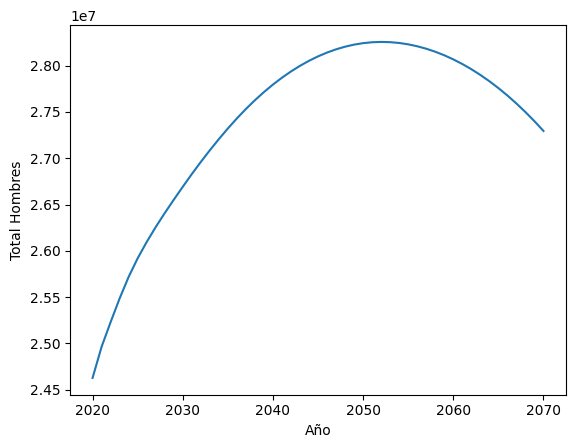

In [69]:
plt.plot(anos_unicos, hombres_total)
plt.xlabel('Año')
plt.ylabel('Total Hombres')
plt.show()


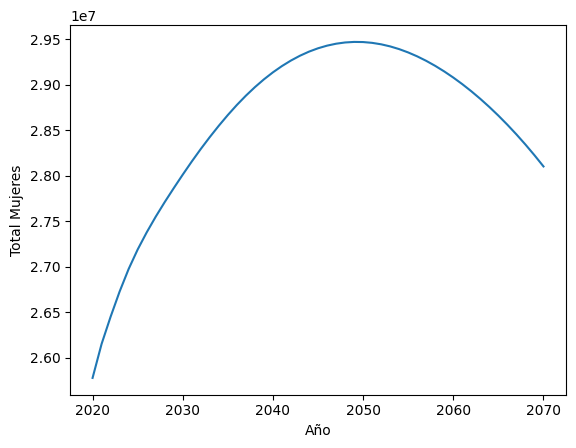

In [70]:
plt.plot(anos_unicos, mujeres_total)
plt.xlabel('Año')
plt.ylabel('Total Mujeres')
plt.show()

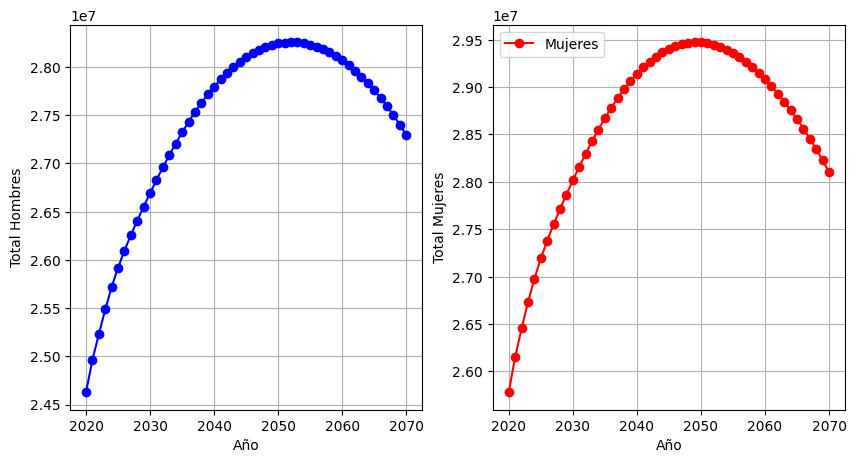

In [71]:
import numpy
hombres_total_grafico = hombres_total.to_numpy()
mujeres_total_grafico = mujeres_total.to_numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar hombres
ax1.plot(anos_unicos, hombres_total_grafico, 'o-', color='blue', label='Hombres')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total Hombres')
ax1.grid(True)

# Graficar mujeres
ax2.plot(anos_unicos, mujeres_total_grafico, 'o-', color='red', label='Mujeres')
ax2.set_xlabel('Año')
ax2.set_ylabel('Total Mujeres')
ax2.grid(True)

# Agregar leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

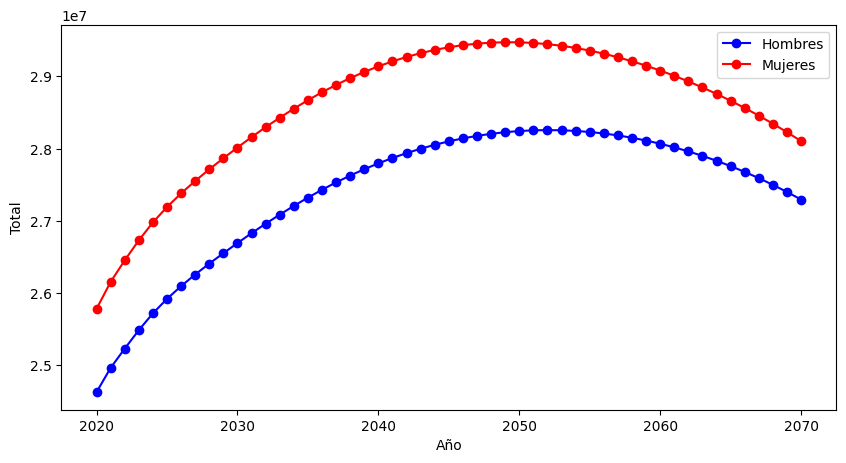

In [72]:
# Crear un subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar hombres
ax.plot(anos_unicos, hombres_total_grafico, 'o-', color='blue', label='Hombres')

# Graficar mujeres
ax.plot(anos_unicos, mujeres_total_grafico, 'o-', color='red', label='Mujeres')

# Agregar leyenda
plt.legend(loc='best')

# Ajustar etiquetas
ax.set_xlabel('Año')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

# Ahora total de hombres y mujeres vs hombres y mujeres

In [73]:
#filtramos total
total = graficar.get('total')
total_total = total[filtro_lugar]

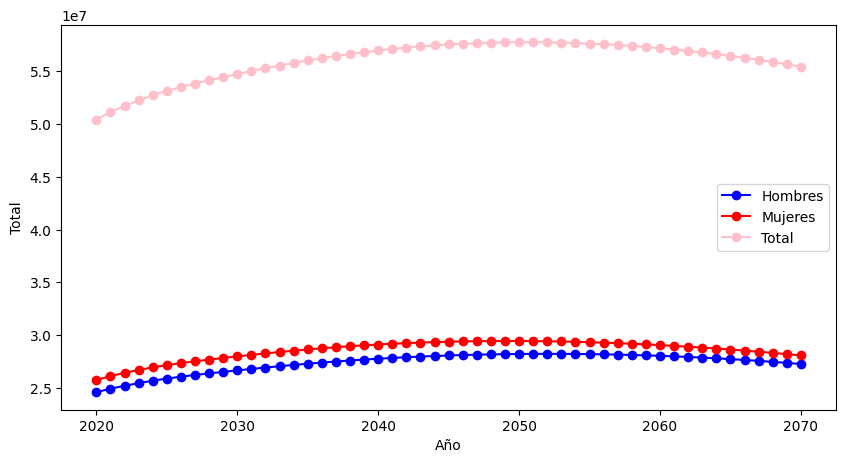

In [74]:
# Crear un subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar hombres
ax.plot(anos_unicos, hombres_total_grafico, 'o-', color='blue', label='Hombres')

# Graficar mujeres
ax.plot(anos_unicos, mujeres_total_grafico, 'o-', color='red', label='Mujeres')
# Graficar mujeres
ax.plot(anos_unicos, total_total, 'o-', color='pink', label='Total')

# Agregar leyenda
plt.legend(loc='best')

# Ajustar etiquetas
ax.set_xlabel('Año')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

# usar ficheros sin descargarlos
en ocasiones los ficheros sobre los que queremos trabajar pueden ser realmente grandes y puede que no nos interese descargarlos por completo. En estos casos podemos utilizar el procesamiento perezoso, que busca utilizar la menor informacion posible:

In [75]:
import requests #pip install requests
from contextlib import closing 
import csv
import codecs
import matplotlib.pyplot as plt

llama la atencion la incorporacion de dos nuevas bibliotecas:

### codecs: 
utilizada para leer directamente los strings en formato utf-8

### contextlib:
nos permite leere directamente el valor devuelto por requests.get

usaremos [este](https://trends.google.com/trends/explore?q=%2Fm%2F03p1r4&date=all) sets de datos de google!

In [76]:

url ='https://www.datos.gov.co/resource/vw9t-pugy.csv'
with closing(requests.get(url, stream=True)) as r:
    reader = csv.reader(codecs.iterdecode(
        r.iter_lines(),
        'utf-8'),
        delimiter=",")
    data = list()
    for row in reader:
        print(row)
        data.append(row)

['codigo', 'ideps', 'eps', 'nomcategorias', 'nomservicio', 'nomespecifique', 'nomindicador', 'resultado', 'nomunidad', 'nomfuente', 'fecha_corte', 'linkfuente']
['E.3.1', 'CCF001', 'COMFAMILIAR CAMACOL', 'Tiempos de espera', 'Citas médicas', 'Mostrar resultado', 'Tiempo promedio de espera para la asignación de cita de Medicina General.', '0', 'Días', 'MinSalud', '20160630', 'http://rssvr2.sispro.gov.co/IndicadoresMOCA/']
['E.3.1', 'CCF002', 'CONFAMA', 'Tiempos de espera', 'Citas médicas', 'Mostrar resultado', 'Tiempo promedio de espera para la asignación de cita de Medicina General.', '0', 'Días', 'MinSalud', '20160630', 'http://rssvr2.sispro.gov.co/IndicadoresMOCA/']
['E.3.1', 'CCF007', 'COMFAMILIAR CARTAGENA', 'Tiempos de espera', 'Citas médicas', 'Mostrar resultado', 'Tiempo promedio de espera para la asignación de cita de Medicina General.', '4.32', 'Días', 'MinSalud', '20160630', 'http://rssvr2.sispro.gov.co/IndicadoresMOCA/']
['E.3.1', 'CCF009', 'COMFABOY', 'Tiempos de espera', '

In [77]:
import pandas as pd

df = pd.DataFrame(data)

# Convierte la primera columna en el encabezado
df.columns = df.iloc[0]

# Elimina la primera fila (ya que ahora es el encabezado)
df = df.iloc[1:]

pd.DataFrame(df)

,codigo,ideps,eps,nomcategorias,nomservicio,nomespecifique,nomindicador,resultado,nomunidad,nomfuente,fecha_corte,linkfuente
1,E.3.1,CCF001,COMFAMILIAR CAMACOL,Tiempos de espera,Citas médicas,Mostrar resultado,Tiempo promedio de espera para la asignación d...,0,Días,MinSalud,20160630,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
2,E.3.1,CCF002,CONFAMA,Tiempos de espera,Citas médicas,Mostrar resultado,Tiempo promedio de espera para la asignación d...,0,Días,MinSalud,20160630,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
3,E.3.1,CCF007,COMFAMILIAR CARTAGENA,Tiempos de espera,Citas médicas,Mostrar resultado,Tiempo promedio de espera para la asignación d...,4.32,Días,MinSalud,20160630,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
4,E.3.1,CCF009,COMFABOY,Tiempos de espera,Citas médicas,Mostrar resultado,Tiempo promedio de espera para la asignación d...,1,Días,MinSalud,20160630,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
5,E.3.1,CCF015,COMFACOR,Tiempos de espera,Citas médicas,Mostrar resultado,Tiempo promedio de espera para la asignación d...,1.64,Días,MinSalud,20160630,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
...,...,...,...,...,...,...,...,...,...,...,...,...
996,E.3.5,EPSS40,Alianza Medellin,Tiempos de espera,Autorizaciones,Cirugía programada,Tiempo promedio de espera para la autorizaci...,48.24,Días,MinSalud,20161231,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
997,E.3.5,ESS002,EMDISALUD,Tiempos de espera,Autorizaciones,Cirugía programada,Tiempo promedio de espera para la autorizaci...,0.61,Días,MinSalud,20161231,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
998,E.3.5,ESS024,COOSALUD E.S.S.,Tiempos de espera,Autorizaciones,Cirugía programada,Tiempo promedio de espera para la autorizaci...,0.74,Días,MinSalud,20161231,http://rssvr2.sispro.gov.co/IndicadoresMOCA/
999,E.3.5,ESS062,ASMET SALUD,Tiempos de espera,Autorizaciones,Cirugía programada,Tiempo promedio de espera para la autorizaci...,2.74,Días,MinSalud,20161231,http://rssvr2.sispro.gov.co/IndicadoresMOCA/


In [78]:
#nuevo dataframe unicamente con dos columnas
conservar = ['codigo', 'resultado']
nueva_inf = df[conservar]

pd.DataFrame(nueva_inf)

,codigo,resultado
1,E.3.1,0
2,E.3.1,0
3,E.3.1,4.32
4,E.3.1,1
5,E.3.1,1.64
...,...,...
996,E.3.5,48.24
997,E.3.5,0.61
998,E.3.5,0.74
999,E.3.5,2.74


In [79]:
# Calcular el promedio agrupando por el código

#primer convertimos todo a valores numericos
nueva_inf['resultado'] = pd.to_numeric(nueva_inf['resultado'])

#agrupamos con los repetidos en codigo y calculamos el promedio de resultado!
df_promedio = nueva_inf.groupby('codigo')['resultado'].mean().reset_index()

pd.DataFrame(df_promedio)

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_7868\1695227189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueva_inf['resultado'] = pd.to_numeric(nueva_inf['resultado'])


,codigo,resultado
0,E.3.1,2.449941
1,E.3.2,3.433764
2,E.3.3,2.872586
3,E.3.4,3.326486
4,E.3.5,4.607273


In [80]:
#seleecionamos los campos 
resultado = df_promedio.get('resultado')
eps = df_promedio.get('codigo')

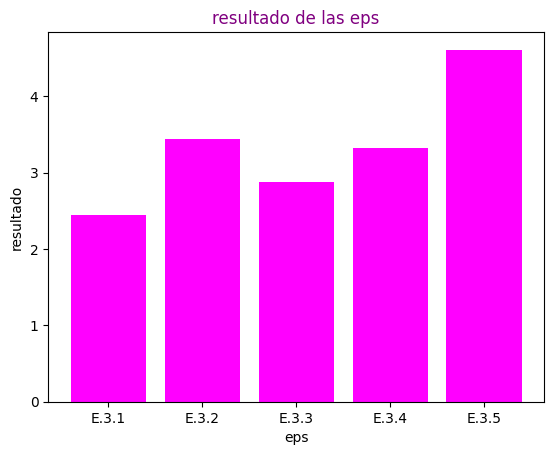

In [81]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Crea una gráfica de barras
plt.bar(eps, resultado,color='magenta')

# Agrega etiquetas a las barras
plt.xticks(eps)

# Agrega un título a la gráfica
plt.title("resultado de las eps",color='purple')

# Agrega etiquetas a los ejes
plt.xlabel("eps")
plt.ylabel("resultado")

# Muestra la gráfica
plt.show()

# Datos que forman parte de la pagina

Este metodo consiste en obtener los datos a aprtir de una pagina web.
para esto encesitamos comprender el codigo HTML, imagenes, scripts y ficheros de estilo.

vamos a cargar la pagina

In [82]:
from bs4 import BeautifulSoup
url = './EJEMPLOS HTML/mini.html'

with open(url, 'r') as f:
    page = f.read()

In [83]:
soup = BeautifulSoup(page, 'html.parser') # contiene la pagina en forma de caracteres!
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Un mini ejemplo!
  </title>
 </head>
 <body>
  <div class="divs" id="primer_div">
   hola! soy un div.
  </div>
  <div class="divs" id="segundo_div">
   hola! soy otro div.
  </div>
 </body>
</html>



Encontraremos informacion de html en el libro. pag 34

In [84]:
hijosDoc = list(soup.children)
for item in hijosDoc:
    print(type(item))
print(hijosDoc)

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
['html', '\n', <html>
<head>
<title>Un mini ejemplo!</title>
</head>
<body>
<div class="divs" id="primer_div">hola! soy un div.</div>
<div class="divs" id="segundo_div">hola! soy otro div.</div>
</body>
</html>]


Ahora podemos seleccionar el tercer elemento y tenemos acceso al elemento html!

In [85]:
html = hijosDoc[2]

print(html, "\n", "="*10)

print(list(html.children)) # cntenido hijo del html

<html>
<head>
<title>Un mini ejemplo!</title>
</head>
<body>
<div class="divs" id="primer_div">hola! soy un div.</div>
<div class="divs" id="segundo_div">hola! soy otro div.</div>
</body>
</html> 
['\n', <head>
<title>Un mini ejemplo!</title>
</head>, '\n', <body>
<div class="divs" id="primer_div">hola! soy un div.</div>
<div class="divs" id="segundo_div">hola! soy otro div.</div>
</body>, '\n']


Queremos seleccionar el titulo, entonces ahora buscamos los elementos!

In [86]:
for dato in list(html.children):
    print(type(dato))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


Recordemos que los elemento ***bs4.element.Tag*** son los elmentos html en si

In [87]:
#seleccionamos el segundo elemento
titulo = list(html.children)[1]
print(titulo)

<head>
<title>Un mini ejemplo!</title>
</head>


In [88]:
titulo_text = list(titulo.children)
for datos in titulo_text:
    print(type(datos))
print("==="*3, "\n TEXTO \n", "==="*3)
titulo_text = titulo_text[1] # elemento title
print(type(titulo_text.children))


<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
 TEXTO 
<class 'list_iterator'>


In [89]:
print(titulo_text.get_text()) #Nos devuelve todo en cadenas de texto

Un mini ejemplo!


## Navegacion relativa
para nuestro primer web scraping hemos ehcho un ejemplo muy simple, sin embargo en ejemplos reales esto se vuelve muy tedioso, ademas que cualquier cambio a la estructura de la apgina hara el codigo inservivble!
para esto usamos BeautifulSoup
con el podemos acceder a cauqlueir elmento html mediante el metodo ***find_all***

In [90]:
#QUEREMOS ACCEDER AL DIV, ENTONCES:
divs = soup.find_all("div")

Si queremos mostrar el contenido del primer div podemos:

In [91]:
print(divs[0].get_text()) # primer div
print(divs[1].get_text()) # segundo div

hola! soy un div.
hola! soy otro div.


en caso de que queramos seleccionar unicamente el primero que encuentre y no todos podemos usar el metodo ***.find***

In [92]:
print(soup.find("div").get_text()) # asi seleccionamos unicamente el primer div!

hola! soy un div.


Seguimos sujetos a la estructura del codigo pero a menor medida, es decir que si el creador de la pagina se le ocurre agregar otro div antes del que bsucamos nuestro codigo dejara de funcionar!
para esto podemos buscar directamente el div con su id unico:

In [93]:
print(soup.find("div", id="primer_div").get_text()) #div con id  "primer_div"
# tambien podemos buscando por class
print(soup.find_all("div", class_="divs")) #div con class = "div"

hola! soy un div.
[<div class="divs" id="primer_div">hola! soy un div.</div>, <div class="divs" id="segundo_div">hola! soy otro div.</div>]


tambien podemos seleccionarlo en orden de jerrarquita

In [94]:
print(soup.select("html div")[0].get_text())

hola! soy un div.


# Ejemplo con pagina real!

Para esto vamos a usar [esta pagina](https://www.boe.es/informacion/hora_oficial.php)

cargaremos la pagina con requests

In [95]:
import requests
url = "https://www.boe.es/informacion/hora_oficial.php"
r = requests.get(url)
print(r)

<Response [200]>


Necesitamos la hora, asi que vamos a analizar el codigo de la pagina.
Vemos que dentro de un div con el id "hora-oficial" se enceuntra una etiqueta p que conteiene la informacion que deseamos!

In [96]:
from bs4 import BeautifulSoup
cajaHora = None
if r:
    newsoup = BeautifulSoup(r.content, "html.parser") #Html de la pagina!
    cajaHora = newsoup.find("div", id="hora-oficial")
    print(cajaHora)

<div id="hora-oficial">
<p class="centrador">domingo, 17 de marzo de 2024, 17:55:03</p>
</div>


In [97]:
if cajaHora != None:
    for data in cajaHora:
        print(type(data))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


tenemos 3 elementos nos importa el tag!

In [98]:
if cajaHora != None:
    fecha = list(cajaHora.children)[1].get_text()
print(fecha)

domingo, 17 de marzo de 2024, 17:55:03


# Informacion con Google Test

In [99]:
modules = ["selenium","chromedriver_autoinstaller"]


import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user",  m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules) 

Instalando módulos
selenium  encontrado
chromedriver_autoinstaller  encontrado
¡Terminado!


In [119]:
import pandas as pd
from bs4 import BeautifulSoup #pip install bs4
from selenium import webdriver
import chromedriver_autoinstaller #pip install chromedriver-autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') # ensure GUI is off
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()


# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

### Paso 2: cargar página
Una vez abierto el navegador lo siguiente es cargar la página que deseemos, en este caso la del catastro. Debemos ver cómo se carga la página correspondiente

In [120]:
url = 'https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx'
driver.get(url)

Es cada vez más normal que al cargar la página tengamos que dar "Aceptar" para quitar el banner inicial sobre cookies

In [121]:
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
#aceptar las cookies

time.sleep(2)
try:
    cookies = driver.find_element(By.LINK_TEXT, "Aceptar cookies")
    cookies.click()
    print("Cookies aceptadas.")
except Exception as e:
    print("No se encontró el botón de aceptar cookies o ocurrió un error:", e)


Cookies aceptadas.


### Paso 3, interacción con la página

Ahora queremos seleccionar la pestaña coordenadas, ya que vamos a introducir las coordenadas de un lugar concreto. Esto se hace en dos fases: primero se selecciona el elemento y luego interaccionamos con él. En este caso comprobamos viendo el código fuente que la etiqueta COORDENADAS es un enlace, sobre el que deseamos hacer click


In [122]:
from selenium.webdriver.common.by import By
coord   = driver.find_element(By.LINK_TEXT,"COORDENADAS") #Buscamos un texto con la posibilidad de dar clic, y que ademas contenga el texto 'COORDENADAS'
coord.click()

Ya en la pestaña, introducimos las coordenadas y hacemos click para buscar la información. En este ejemplo hemos puesto las coordenadas  long=1.893817, lat=41.545639, pero pueden ser otras cualesquiera

In [123]:
#es posible que salga un error si no dejamos un tiempo de espera, por lo cual haremos un tiempo de espera
time.sleep(1)

lat = driver.find_element(By.ID,"ctl00_Contenido_txtLatitud")
lon = driver.find_element(By.ID,"ctl00_Contenido_txtLongitud")
latitud  = "41.545639 "
longitud = "1.893817"
lat.send_keys(latitud)
lon.send_keys(longitud)

orpimimos el boton!

In [124]:
datos = driver.find_element(By.ID, "ctl00_Contenido_btnDatos")
datos.click()

Por defecto selenium cambia el continideo de driver al ejecutar los clics.
Vamos a retroceder en la pagina, y luego volveremos a adelantarnos

In [106]:
time.sleep(5)
driver.execute_script("window.history.go(-1)")

time.sleep(1)

driver.execute_script("window.history.go(+1)")

### Xpath
[aqui](https://www.w3schools.com/xml/xpath_intro.asp) peudes encontrar mas documentacion <br>
o en el documeno detallado describeindo el elguaje, mas complejo pero interesante [aqui](www.w3.org/TR/xpath)

si queremos por ejemplo ver todos los elementos que tiene el body podemos ejecutar:

In [127]:
hijos = "/html/body/*"
etiquetas = driver.find_elements(By.XPATH, hijos)
for i in etiquetas:
    print(i.tag_name) # con esto podemos ver todos los hijos del body!

div
div
form
div
script
a
script
link
script
script
script


El elemento div peude ser seguido por otros.
por ejemplo. supongamos que queremos saber cuantos elementos de tipo div son nietos del body:

In [128]:
hijos = "/html/body/*/div"
etiquetas = driver.find_elements(By.XPATH, hijos)
for i in etiquetas:
    print(i.tag_name) # con esto podemos ver todos div's que son hijos del body!

div
div
div


Ahora supongamos que queremos determinar el uso principal de este inmueble, para ellos buscamos 

In [107]:
xpath = "//*[./span/text()='Referencia catastral']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)
xpath = "//*[./span/text()='Uso principal']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)

7801701DF0070S0001QY    
Religioso


### Otras pruebas

Texto de la página

In [108]:
html = driver.find_element(By.XPATH,"/html")
print(html.text)

Formulario master
Castellano
ICONO CORREO ELECTRÓNICO
CONTÁCTENOS
Icono página de inicio
Consulta y certificación de Bien Inmueble
Volver
CARTOGRAFÍA
CONSULTA DESCRIPTIVA Y GRÁFICA
IMPRIMIR DATOS
VISOR 3D
DATOS DESCRIPTIVOS DEL INMUEBLE
Referencia catastral
7801701DF0070S0001QY    
Localización
PZ NOVA 20
08640 OLESA DE MONTSERRAT (BARCELONA)
Clase
Urbano
Uso principal
Religioso
Superficie construida
3.221 m2
Año construcción
1400
PARCELA CATASTRAL

Parcela construida sin división horizontal
Localización
PZ NOVA 20
OLESA DE MONTSERRAT (BARCELONA)
Superficie gráfica
1.884 m2
CONSTRUCCIÓN
Uso principal Escalera Planta Puerta Superficie m2 Tipo Reforma Fecha Reforma
RELIGIOSO T OD OS 2.117 I Reforma mínima 1.960
RELIGIOSO T OD OS 249 I Reforma mínima 1.960
ALMACEN T OD OS 765 I Reforma mínima 1.960
RELIGIOSO 1 00 01 13 O Reforma total 2.002
RELIGIOSO 1 01 01 26 O Reforma total 2.002
RELIGIOSO 1 01 01 51
¿Cómo se pueden obtener datos protegidos (titularidad y valor catastral) de los inmueb

Caminos absolutos

In [109]:
head = driver.find_element(By.XPATH,"/html/head")
body = driver.find_element(By.XPATH,"/html/body")
html2 = body.find_element(By.XPATH,"/html")

Hijos de un elemento

In [110]:
hijos = driver.find_elements(By.XPATH,"/html/body/*")
for element in hijos:
    print(element.tag_name)

div
div
form
div
script
a
script
link
script
script
script


Camino relativo

In [111]:
divs = driver.find_elements(By.XPATH,"/html/body/*/div")
print(len(divs))

3


In [112]:
divs = body.find_elements(By.XPATH,"./*/div")
print(len(divs))

3


Saltar pasos intermedios

In [113]:
divs = driver.find_elements(By.XPATH,"/html/body//div")
print(len(divs))

155


In [114]:
labels = driver.find_elements(By.XPATH,"//label")
print(len(labels))

19


Insertar texto

In [115]:
id = "ctl00_Contenido_tblInmueble"
div = driver.find_element(By.ID,id)
label = div.find_element(By.XPATH,"//label")
print(label.text)

7801701DF0070S0001QY    


In [116]:
xpath = "//*[./span/text()='Referencia catastral']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)

7801701DF0070S0001QY    


In [117]:
clase = driver.find_elements(By.XPATH,"(//label)[position()=3]")
print(clase[0].text)

etiqs = driver.find_elements(By.XPATH,"//label")
print(etiqs[2].text)

ulti = driver.find_elements(By.XPATH,"(//label)[last()]")
print(ulti[0].text)


In [118]:
driver.close()